In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Loan_Approval_Dataset.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

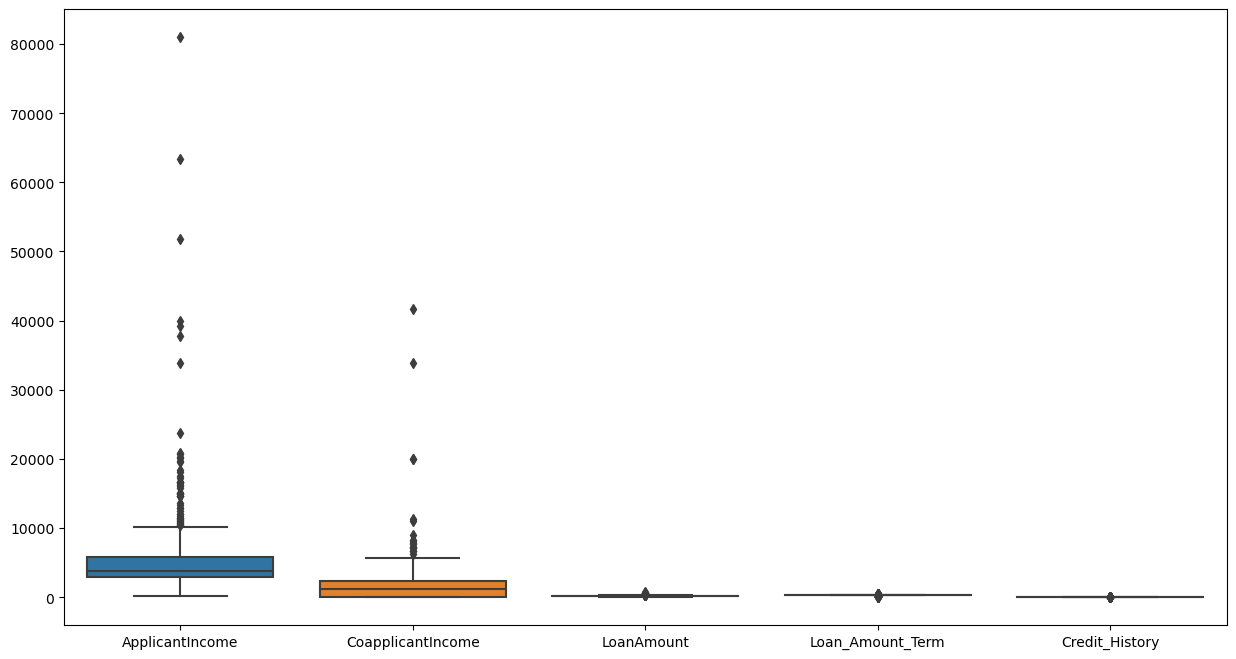

In [9]:
#identifying the outliers

plt.figure(figsize=(15,8))
sns.boxplot(data=df)

In [10]:
# Filling the null values of numercial datatype with the mean and median of the column.

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
# Filling the null values of object data types

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


Number of who has taken laon by Gender
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

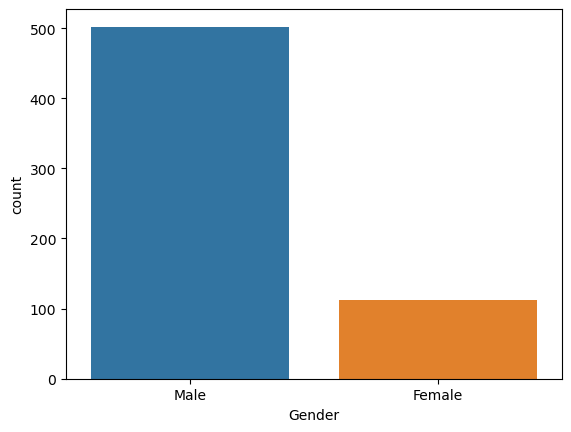

In [14]:
# visualisation for analysis

print('Number of who has taken laon by Gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df)

Number of who has taken laon by Married
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

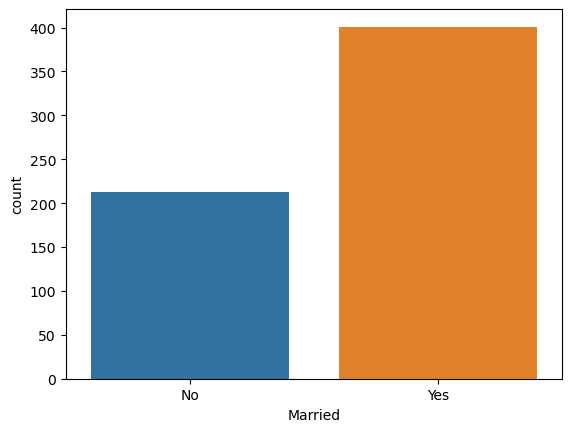

In [15]:
print('Number of who has taken laon by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df)

Number of who has taken laon by educational background
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

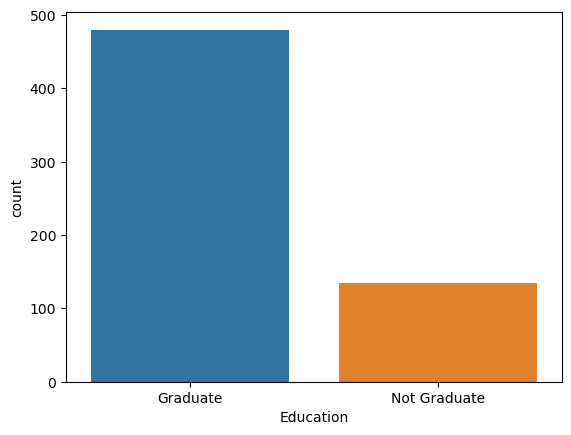

In [16]:
print('Number of who has taken laon by educational background')
print(df['Education'].value_counts())
sns.countplot(x='Education', data=df)

In [17]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


<Axes: >

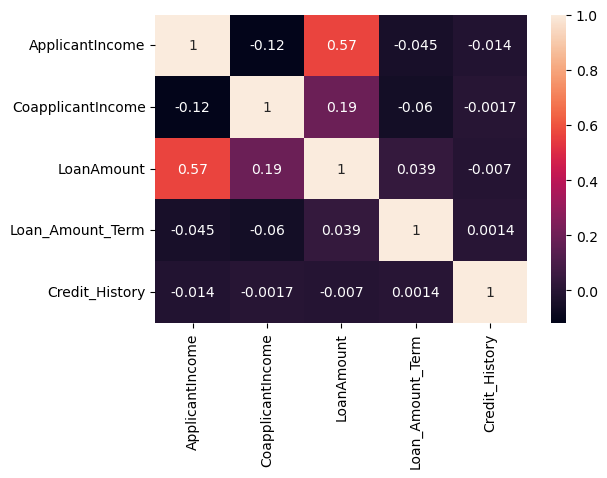

In [19]:
corelation = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corelation, annot=True)

In [20]:
df['Total_Applicant_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

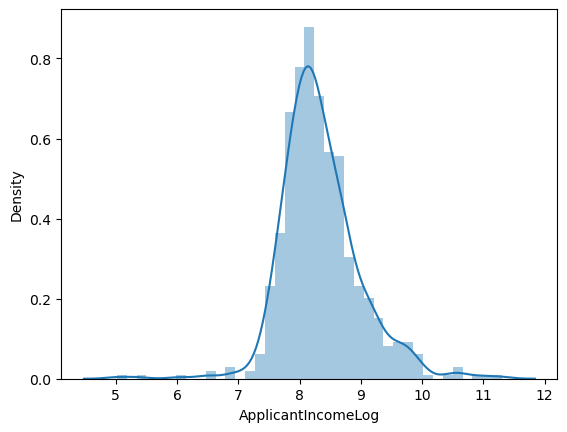

In [23]:
# Apply log function

df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomeLog'])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

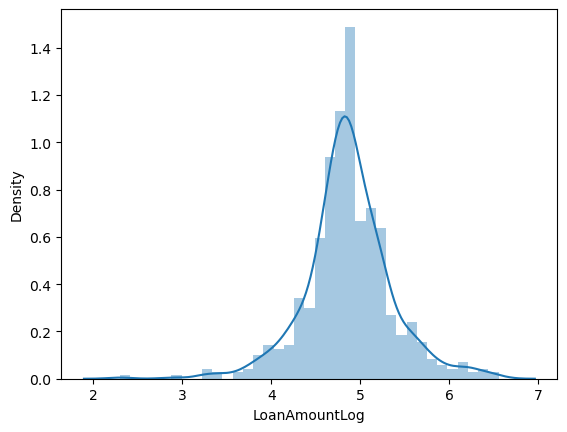

In [24]:
df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountLog'])

<Axes: xlabel='LoanAmountTermLog', ylabel='Density'>

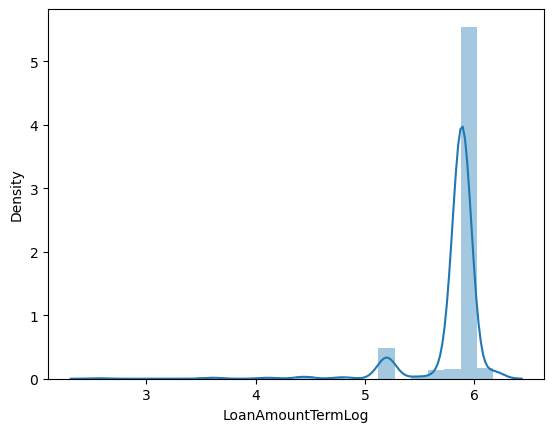

In [25]:
df['LoanAmountTermLog'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['LoanAmountTermLog'])

<Axes: xlabel='TotalApplicantIncomeLog', ylabel='Density'>

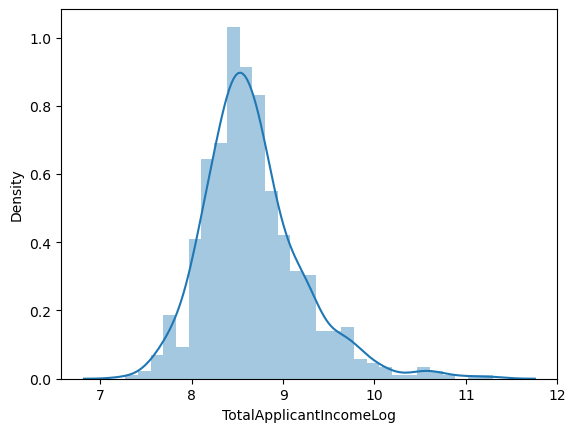

In [26]:
df['TotalApplicantIncomeLog'] = np.log(df['Total_Applicant_Income'])
sns.distplot(df['TotalApplicantIncomeLog'])

In [27]:
Unwanted_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Applicant_Income','Loan_ID']
df = df.drop(columns = Unwanted_cols, axis=1)

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog,TotalApplicantIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699515


In [30]:
# Encoding: Label encoding for categorical data types

from sklearn.preprocessing import LabelEncoder
EC = LabelEncoder()

columns = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for cols in columns:
    df[cols] = EC.fit_transform(df[cols])


In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog,TotalApplicantIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674026
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714568
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006368
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505323
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699515


In [32]:
df.dtypes

Gender                       int32
Married                      int32
Dependents                  object
Education                    int32
Self_Employed                int32
Credit_History             float64
Property_Area                int32
Loan_Status                  int32
ApplicantIncomeLog         float64
LoanAmountLog              float64
LoanAmountTermLog          float64
TotalApplicantIncomeLog    float64
dtype: object

In [33]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog,TotalApplicantIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674026
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714568
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006368
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505323
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972811,4.276666,5.888878,7.972466
610,1,1,3+,0,0,1.0,0,1,8.320448,3.713572,5.198497,8.320205
611,1,1,1,0,0,1.0,2,1,8.996280,5.537334,5.888878,9.025456
612,1,1,2,0,0,1.0,2,1,8.933796,5.236442,5.888878,8.933664


In [34]:
df.loc[610, 'Dependents'] = '3'

# Convert the 'Dependents' column to integer data type
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(int)

In [35]:
df.dtypes

Gender                       int32
Married                      int32
Dependents                   int32
Education                    int32
Self_Employed                int32
Credit_History             float64
Property_Area                int32
Loan_Status                  int32
ApplicantIncomeLog         float64
LoanAmountLog              float64
LoanAmountTermLog          float64
TotalApplicantIncomeLog    float64
dtype: object

In [37]:
# splitting the independent and dependent feature

x = df.drop(columns = ['Loan_Status'], axis=1)
y = df['Loan_Status']

In [38]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog,TotalApplicantIncomeLog
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674026
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714568
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006368
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505323
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972466
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320205
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025456
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933664


In [39]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [42]:
# Building the ML model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [59]:
# fitting the model for logisitc regression

model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [46]:
# Model Evaluation

accuracy*100

80.51948051948052

In [47]:
score=cross_val_score(model1,x,y,cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [48]:
np.mean(score)*100

80.9462881514061

In [60]:
# Decision Tree Classfier

model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

In [53]:
accuracy*100

66.88311688311688

In [61]:
# Random Forest Classifier

model3 = RandomForestClassifier()
model3.fit(x_train, y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy score of Random Forest Classifier:', accuracy*100)

The accuracy score of Random Forest Classifier: 70.77922077922078


In [62]:
# K Neighbor Classifier

model4 = KNeighborsClassifier()
model4.fit(x_train, y_train)
y_pred_model4 = model4.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy of score of KNeighborsClassifier:', accuracy*100)

The accuracy of score of KNeighborsClassifier: 70.77922077922078


In [57]:
score  = cross_val_score(model4,x,y,cv=5)
score

array([0.77235772, 0.74796748, 0.73170732, 0.76422764, 0.75409836])

In [58]:
np.mean(score*100)

75.40717046514727

In [64]:
# classification report

from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_pred, y_test)
    print(f"Classification report for {model_name}:\n{report}\n")
          
generate_classification_report(model1, y_test, y_pred_model1)
generate_classification_report(model2, y_test, y_pred_model2)
generate_classification_report(model3, y_test, y_pred_model3)
generate_classification_report(model4, y_test, y_pred_model4)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.34      0.82      0.48        17
           1       0.97      0.80      0.88       137

    accuracy                           0.81       154
   macro avg       0.66      0.81      0.68       154
weighted avg       0.90      0.81      0.84       154


Classification report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.56      0.44      0.49        52
           1       0.74      0.82      0.78       102

    accuracy                           0.69       154
   macro avg       0.65      0.63      0.64       154
weighted avg       0.68      0.69      0.68       154


Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.39      0.59      0.47        27
           1       0.90      0.80      0.85       127

    accuracy                